In [3]:
import numpy as numpy
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append(str(Path.cwd().parent))
import heisensim as sim
import scripts.positions as poslib
import scripts.simlib as simlib
PATH = Path.cwd().parent

In [4]:
def pick_points(sampler, limit):
    points = sampler.sample_positions(1)
    try:
        while points.shape[0] < limit:
            points = sampler._append_to_pos(points)
    except RuntimeError:
        pass
    return points.shape[0]

def point_ratio(geom, dim, rho, N=20, it=100, seed=5):
    np.random.seed(seed)
    sampler = simlib.SAMPLING_GENERATORS[geom](N=N, rho=rho, dim=dim)
    total = 0
    for i in range(it):
        total += pick_points(sampler, N)
    return total/(N*it)

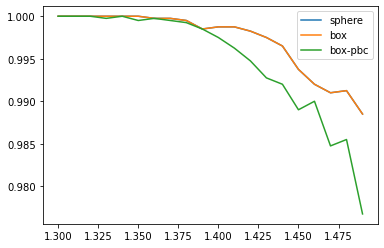

In [19]:
#cutoff rho=1.25
d = 1
rhos = np.round(np.arange(1.3, 1.5, 0.005), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=20, it=200) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

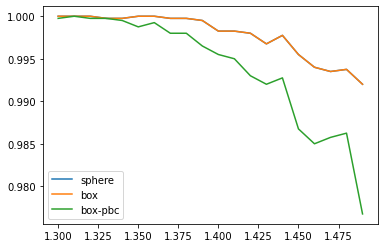

In [20]:
d = 1
rhos = np.round(np.arange(1.3, 1.5, 0.005), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=10, it=400) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

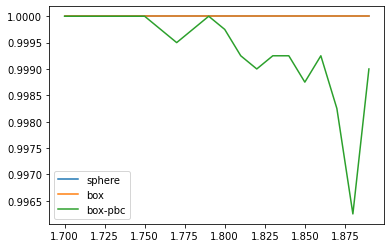

In [17]:
# cutoff rho = 1.7
d = 2
rhos = np.round(np.arange(1.7, 1.9, 0.01), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=20, it=200) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

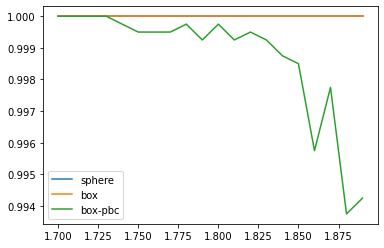

In [18]:
d = 2
rhos = np.round(np.arange(1.7, 1.9, 0.01), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=10, it=400) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

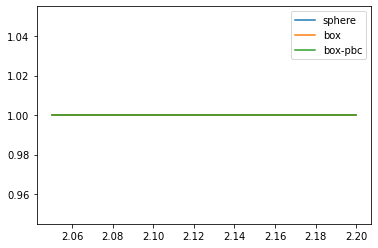

In [24]:
d = 3
rhos = np.round(np.arange(2.05, 2.2, 0.025), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=20, it=200) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

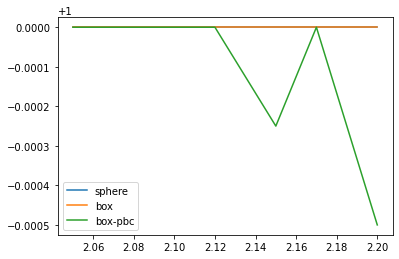

In [23]:
d = 3
# cutoff -> rho=2.0
rhos = np.round(np.arange(2.05, 2.2, 0.025), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=10, it=400) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()